[Table of Contents](./table_of_contents.ipynb)

# Предисловие

In [1]:
%matplotlib inline

In [2]:
#format the book
import book_format
book_format.set_style()

Please install FilterPy from the command line by running the command
	$ pip install filterpy

See chapter 0 for instructions.


UnboundLocalError: local variable 'filterpy' referenced before assignment

Вводный учебник по фильтрам Калмана и байесовским фильтрам. Книга написана с использованием Jupyter Notebook, поэтому вы можете читать книгу в своем браузере, а также запускать и изменять код, видя результаты внутри книги. Что может быть лучше для обучения?

## Фильтры Калмана и Байеса

Датчики шумят. Мир полон данных и событий, которые мы хотим измерять и отслеживать, но мы не можем полагаться на датчики, чтобы получить точную информацию. GPS в моей машине сообщает о высоте. Каждый раз, когда я проезжаю одну и ту же точку на дороге, он сообщает немного другую высоту. Мои кухонные весы дают мне разные показания, если я взвешиваю один и тот же предмет дважды.

В простых случаях решение очевидно. Если моя шкала дает немного другие показания, я могу просто взять несколько показаний и усреднить их. Или я могу заменить его более точной шкалой. Но что мы делаем, когда датчик сильно шумит или окружающая среда затрудняет сбор данных? Возможно, мы пытаемся отследить движение низко летящего самолета. Возможно, мы захотим создать автопилот для дрона или убедиться, что наш сельскохозяйственный трактор засеял все поле. Я работаю над компьютерным зрением, и мне нужно отслеживать движущиеся объекты на изображениях, а алгоритмы компьютерного зрения создают очень шумные и ненадежные результаты. 

Я использую много разных алгоритмов, но все они основаны на *Байесовской вероятности*. Проще говоря, байесовская вероятность определяет, что, вероятно, будет правдой, основываясь на прошлой информации. 

Если бы я спросил вас, куда направляется моя машина в этот момент, вы бы понятия не имели. Вы бы предпочли число от 1$^\circ$ and 360$^\circ$ градусов, и у вас был бы шанс оказаться правым 1 из 360. Теперь предположим, что я сказал вам, что 2 секунды назад его значение было равно 243$^\circ$. За 2 секунды моя машина не смогла развернуться очень далеко, так что вы могли бы сделать гораздо более точный прогноз. Вы используете прошлую информацию для более точного определения информации о настоящем или будущем. 

Мир тоже шумный. Это предсказание помогает вам сделать более точную оценку, но оно также подвержено влиянию шума. Возможно, я просто затормозил из-за собаки или объехал выбоину. Сильный ветер и гололед на дороге - это внешние факторы, влияющие на траекторию движения моей машины. В литературе по управлению мы называем это *шумом*, хотя вы можете думать об этом по-другому. 

В Байесовской вероятности есть нечто большее, но у вас есть основная идея. Знание неопределенно, и мы меняем наши убеждения, основываясь на силе доказательств. Фильтры Калмана и Байеса объединяют наши зашумленные и ограниченные знания о том, как ведет себя система, с зашумленными и ограниченными показаниями датчиков, чтобы получить наилучшую возможную оценку состояния системы. Наш принцип заключается в том, чтобы никогда не отбрасывать информацию.

Допустим, мы отслеживаем объект, и датчик сообщает, что он внезапно изменил направление. Действительно ли он включился, или данные зашумлены? Это зависит. Если это реактивный истребитель, мы были бы очень склонны поверить сообщению о внезапном маневре. Если бы это был грузовой поезд на прямом пути, мы бы его не учитывали. Мы бы еще больше изменили наши убеждения в зависимости от того, насколько точен датчик. Наши убеждения зависят от прошлого и от наших знаний о системе, которую мы отслеживаем, а также от характеристик датчиков. 

Фильтр Калмана был изобретен Рудольф Эмиль Калман для решения такого рода задач математически оптимальным способом. Его первое применение было во время полетов "Аполлона" на Луну, и с тех пор он использовался в самых разных областях. Фильтры Калмана есть в самолетах, на подводных лодках и на крылатых ракетах. Уолл-стрит использует их для отслеживания рынка. Они используются в роботах, в датчиках Интернета вещей ([IoT](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82_%D0%B2%D0%B5%D1%89%D0%B5%D0%B9)) и в лабораторных приборах. Химические заводы используют их для контроля и мониторинга реакций. Они используются для выполнения медицинской визуализации и для удаления шума из сердечных сигналов. Если это связано с датчиком и / или данными временных рядов, обычно используется фильтр Калмана или близкий родственник фильтра Калмана.

## Мотивация для этой книги

Я инженер-программист, который почти два десятилетия проработал в аэрокосмической отрасли, и поэтому я всегда сталкивался с фильтром Калмана, но никогда его не внедрял. У него всегда была устрашающая репутация. Теория прекрасна, но довольно сложна для изучения, если вы еще не хорошо разбираетесь в таких темах, как обработка сигналов, теория управления, вероятность и статистика, а также теория управления и управления. Когда я перешел к решению задач отслеживания с помощью компьютерного зрения, необходимость реализовать их самостоятельно стала насущной. 

В этой области есть отличные учебники, такие как [*Фильтрация по Калману* под авторством Гревала и Эндрю](https://www.researchgate.net/publication/243786641_Kalman_filtering_theory_and_practice_using_MATLAB). Но сесть и попытаться прочитать многие из этих книг - это мрачный и тяжелый опыт, если у вас нет необходимого опыта. Обычно первые несколько глав проходят через несколько лет обучения математике в бакалавриате, беспечно отсылая вас к учебникам по математическому исчислению и представляя статистику за целый семестр в нескольких кратких абзацах. Это учебники для старших курсов бакалавриата или магистратуры, а также бесценный справочник для исследователей и профессионалов, но для более случайного читателя это действительно сложно. Обозначения вводятся без объяснения причин, в разных текстах используются разные слова и имена переменных для одного и того же понятия, а книги почти лишены примеров или проработанных задач. Я часто обнаруживал, что могу разобрать слова и понять математику определения, но понятия не имел о том, какие явления реального мира пытались описать эти слова и математика. "Но что это*значит?*" думал я. Вот типичные примеры, которые когда-то озадачили меня:

$$\begin{aligned}\hat{x}_{k} = \Phi_{k}\hat{x}_{k-1} + G_k u_{k-1} + K_k [z_k - H \Phi_{k} \hat{x}_{k-1} - H G_k u_{k-1}]
\\ 
\mathbf{P}_{k\mid k} = (I - \mathbf{K}_k \mathbf{H}_{k})\textrm{cov}(\mathbf{x}_k - \hat{\mathbf{x}}_{k\mid k-1})(I - \mathbf{K}_k \mathbf{H}_{k})^{\text{T}}  + \mathbf{K}_k\textrm{cov}(\mathbf{v}_k )\mathbf{K}_k^{\text{T}}\end{aligned}$$

Однако, когда я начал, наконец, понимать фильтр Калмана, я понял, что лежащие в его основе концепции довольно просты. Если вы знаете несколько простых правил вероятности и обладаете некоторой интуицией относительно того, как мы объединяем неопределенные знания, концепции фильтра Калмана доступны. Фильтры Калмана считаются очень сложными, но, лишенные большей части формальной терминологии, красота предмета и их математика стали мне понятны, и я влюбился в эту тему.

По мере того как я начинал понимать математику и теорию, появлялось все больше трудностей. В книге или статье будет сделано какое-то утверждение о факте и представлен график в качестве доказательства. К сожалению, мне непонятно, почему это утверждение верно, или я не могу воспроизвести сюжет. Или, может быть, мне интересно: "Верно ли это, если R = 0?" Или автор предоставляет псевдокод на таком высоком уровне, что реализация неочевидна. Некоторые книги предлагают код Matlab, но у меня нет лицензии на этот дорогой пакет. Наконец, многие книги заканчивают каждую главу множеством полезных упражнений. Упражнения, которые вам нужно понять, если вы хотите реализовать фильтры Калмана для себя, но упражнения без ответов. Если вы используете книгу в классе, возможно, это нормально, но это ужасно для независимого читателя. Мне неприятно, что автор утаивает от меня информацию, предположительно, чтобы избежать "обмана" со стороны ученика в классе.

Все это мешает обучению. Я хочу отслеживать изображение на экране или написать какой-нибудь код для моего проекта Arduino. Я хочу знать, как создаются сюжеты в книге, и выбирать параметры, отличные от выбранных автором. Я хочу провести моделирование. Я хочу добавить больше шума в сигнал и посмотреть, как работает фильтр. Существуют тысячи возможностей для использования фильтров Калмана в повседневном коде, и все же эта довольно простая тема - происхождение ученых-ракетчиков и академиков.

Я написал эту книгу, чтобы удовлетворить все эти потребности. Это не единственная книга для вас, если вы разрабатываете военные радары. Иди и получи степень магистра или доктора философии в отличной STEM-школе, потому что тебе это понадобится. Эта книга предназначена для любителей, любознательных и работающих инженеров, которым необходимо фильтровать или сглаживать данные. Если вы любитель, в этой книге должно быть все, что вам нужно. Если вы серьезно относитесь к фильтрам Калмана, вам понадобится больше. Мое намерение состоит в том, чтобы ввести достаточное количество концепций и математики, чтобы сделать учебники и статьи доступными.

Эта книга интерактивна. Хотя вы можете прочитать его онлайн как статический контент, я настоятельно призываю вас использовать его по назначению. Он написан с помощью Jupyter Notebook. Это позволяет мне объединять текст, математику, Python и вывод на Python в одном месте. Каждый график, каждая часть данных в этой книге генерируются с помощью Python внутри notebook. Хотите удвоить значение параметра? Просто измените значение параметра и нажмите CTRL-ENTER. Появится новый график или печатный результат. 

В этой книге есть упражнения, но в ней также есть ответы. Я доверяю тебе. Если вам просто нужен ответ, продолжайте и прочитайте ответ. Если вы хотите усвоить эти знания, попробуйте выполнить упражнение, прежде чем читать ответ. Поскольку книга интерактивна, вы вводите и запускаете свое решение внутри книги - вам не нужно переходить в другую среду или иметь дело с импортом множества материалов перед запуском.

Эта книга бесплатна. Я потратил несколько тысяч долларов на книги Калмана по фильтрации. Я не могу поверить, что они находятся в пределах досягаемости кого-то в условиях депрессивной экономики или студента, испытывающего финансовые трудности. Я так много получил от свободного программного обеспечения, такого как Python, и бесплатных книг, таких как книги Аллена Б. Дауни [1]. Пришло время отплатить за это. Итак, книга бесплатна, она размещена на бесплатных серверах в GitHub и использует только бесплатное и открытое программное обеспечение, такое как IPython и MathJax.

## Reading Online

<b>GitHub</b>

Книга размещена на GitHub, и вы можете прочитать любую главу, нажав на ее название. GitHub статически отображает записные книжки Jupyter. Вы не сможете запустить или изменить код, но вы можете прочитать все содержимое.

Страницы GitHub для этого проекта находятся по адресу:

    https://github.com/kiri11-mi1/Kalman-and-Bayesian-Filters-in-Python 


<b>binder</b>

binder обслуживает интерактивные записные книжки онлайн, поэтому вы можете запускать код и изменять код в своем браузере, не загружая книгу и не устанавливая Jupyter. Используйте эту ссылку, чтобы получить доступ к книге через binder:

    http://mybinder.org/repo/rlabbe/Kalman-and-Bayesian-Filters-in-Python

<b>nbviewer</b>

Веб-сайт nbviewer отобразит любую записную книжку в статическом формате. Я нахожу, что он работает немного лучше, чем средство визуализации GitHub, но его немного сложнее использовать. Он обращается к GitHub напрямую; все, что я проверил в GitHub, будет отображаться nbviewer.

Вы можете получить доступ к этой книге через nbviewer здесь:

http://nbviewer.ipython.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/table_of_contents.ipynb

## PDF версия

Я периодически создаю PDF-файл книги из записных книжек. Вы можете получить к нему доступ здесь:

https://drive.google.com/file/d/0By_SW19c1BfhSVFzNHc0SjduNzg/view?usp=sharing

## Загрузка и запуск книги

Однако эта книга задумана как интерактивная, и я рекомендую использовать ее в такой форме. Настройка требует немного больше усилий, но оно того стоит. Если вы установите IPython и некоторые вспомогательные библиотеки на свой компьютер, а затем клонируете эту книгу, вы сможете самостоятельно запускать весь код из книги. Вы можете проводить эксперименты, видеть, как фильтры реагируют на разные данные, видеть, как разные фильтры реагируют на одни и те же данные, и так далее. Я нахожу такого рода немедленную обратную связь жизненно важной и бодрящей. Вам не нужно задаваться вопросом "что произойдет, если". Попробуйте и посмотрите!

Инструкции по установке можно найти в приложении по установке, которое находится [здесь](http://nbviewer.ipython.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Appendix-A-Installation.ipynb).

После установки программного обеспечения вы можете перейти в каталог установки и запустить Jupyter notebook с помощью инструкции командной строки

    jupyter notebook

Это откроет окно браузера, показывающее содержимое базового каталога. Книга разделена на главы. Каждая глава называется *xx*-*name*.ipynb, где *xx* - номер главы. .ipynb - это расширение файла Notebook. Чтобы прочитать главу 2, нажмите на ссылку для главы 2. Это приведет к тому, что браузер откроет этот подкаталог. В каждом подкаталоге будет один или несколько записных книжек IPython (все записные книжки имеют расширение файла .ipynb). Содержимое главы находится в записной книжке с тем же именем, что и название главы. Иногда существуют вспомогательные записные книжки для выполнения таких действий, как создание анимаций, которые отображаются в главе. Они не предназначены для чтения конечным пользователем, но, конечно, если вам интересно, как создается анимация, продолжайте и посмотрите.

По общему признанию, это громоздкий интерфейс к книге. Я иду по стопам нескольких других проектов, которые перепрофилируют Jupyter Notebook для создания целых книг. Я чувствую, что небольшие неприятности приносят огромную пользу - вместо того, чтобы загружать отдельную базу кода и запускать ее в IDE, пока вы пытаетесь читать книгу, весь код и текст находятся в одном месте. Если вы хотите изменить код, вы можете сделать это и сразу увидеть последствия вашего изменения. Если вы обнаружите ошибку, вы можете исправить ее и отправить обратно в мой репозиторий, чтобы все в мире получили выгоду. И, конечно же, вы никогда не столкнетесь с проблемой, с которой я постоянно сталкиваюсь с традиционными книгами - книга и код не синхронизированы друг с другом, и вам остается ломать голову над тем, какому источнику доверять.

## Jupyter

Во-первых, несколько слов об использовании записных книжек Jupyter в этой книге. Эта книга интерактивна. Если вы хотите запустить примеры кода, и особенно если вы хотите увидеть анимированные графики, вам нужно будет запустить ячейки кода. Я не могу научить вас всему, что касается записных книжек Jupyter. Однако некоторые вещи сбивают читателей с толку. Вы можете пойти в http://jupyter.org/ для получения подробной документации.

Во-первых, вы всегда должны запускать самую верхнюю ячейку кода, ту, что с комментарием `#format the book`. Он находится прямо над нами. Это не просто настраивает форматирование, о котором вы, возможно, не заботитесь, но также загружает некоторые необходимые модули и выполняет некоторые глобальные настройки, касающиеся построения графика и печати. Итак, всегда запускайте эту ячейку, если только вы не просто пассивно читаете.

Строчка

```python
%matplotlib inline
```
вызывает отображение графиков внутри записной книжки. Matplotlib - это пакет построения графиков, который описан ниже. По причинам, которые я не понимаю, Jupyter Notebook создаёт графики во отдельном окне.

Знак процента в `%matplotlib` используется для IPython *magic* - это команды ядру для выполнения действий, которые не являются частью языка Python. Есть много полезных магических команд, и вы можете прочитать о них здесь: http://ipython.readthedocs.io/en/stable/interactive/magics.html 

Запустить код внутри ячейки очень просто. Щелкните по нему так, чтобы он был в фокусе (вокруг него будет нарисован прямоугольник), а затем нажмите CTRL-Enter.

Во-вторых, ячейки должны быть запущены по порядку. Я разбиваю проблемы на несколько ячеек; если вы попытаетесь просто перейти вниз и запустить десятую ячейку кода, это почти наверняка не сработает. Если вы еще ничего не запускали, просто выберите *Run All Above* из пункта меню **Cell**. Это самый простой способ убедиться, что все было запущено.

После запуска ячеек вы часто можете прыгать и повторно запускать ячейки в разных порядках, но не всегда. Я пытаюсь это исправить, но есть компромисс. Я определю переменную в ячейке 10 (скажем), а затем запущу код, который изменяет эту переменную в ячейках 11 и 12. Если вы вернетесь назад и снова запустите ячейку 11, переменная будет иметь значение, заданное в ячейке 12, и код ожидает значение, заданное в ячейке 10. Таким образом, иногда вы будете получать странные результаты, если будете запускать ячейки не по порядку. Мой совет - немного отступить назад и снова запустить ячейки, чтобы вернуться в правильное состояние. Это раздражает, но интерактивный аспект Jupyter тетрадок с лихвой компенсирует это. А еще лучше, отправьте сообщение о проблеме на GitHub, чтобы я знал о проблеме и исправил ее!

Наконец, некоторые читатели сообщили о проблемах с функциями анимированного отображения в некоторых браузерах. Я не смог воспроизвести это. В некоторых частях книги я использую магию `%matplotlib notebook`, которая позволяет создавать интерактивные графики. Если эти графики не работают для вас, попробуйте изменить это на `%matplotlib inline`. Вы потеряете анимированный сюжет, но, похоже, он работает на всех платформах и браузерах.

## SciPy, NumPy, и Matplotlib

SciPy - это набор программного обеспечения для математики с открытым исходным кодом. В SciPy включены NumPy, который предоставляет объекты массива, линейную алгебру, случайные числа и многое другое. Matplotlib обеспечивает построение графиков массивов NumPy. Модули Scipy дублируют некоторые функциональные возможности NumPy, добавляя при этом такие функции, как оптимизация, обработка изображений и многое другое.

Чтобы мои усилия по написанию этой книги были управляемыми, я решил предположить, что вы знаете, как программировать на Python, и что вы также знакомы с этими пакетами. Тем не менее, я уделю несколько минут, чтобы проиллюстрировать некоторые особенности каждого из них; реально вам придется найти внешние источники, которые научат вас деталям. Домашняя страница SciPy, https://scipy.org , является идеальной отправной точкой, хотя вскоре вам захочется поискать соответствующие учебные пособия и/или видео.

NumPy, SciPy и Matplotlib не поставляются с дистрибутивом Python по умолчанию; см. Приложение *Установка*, если они у вас не установлены.

Я использую структуру данных Numpy array на протяжении всей книги, так что давайте узнаем о них сейчас. Я научу вас достаточно, чтобы начать работу; обратитесь к документации NumPy, если вы хотите стать экспертом.

`numpy.array` реализует одномерный или более массив. Его тип - `numpy.ndarray`, и мы будем называть это сокращенно ndarray. Вы можете создать его с помощью любого объекта, подобного списку. Следующее создает одномерный массив из списка:

In [3]:
import numpy as np
x = np.array([1, 2, 3])
print(type(x))
x

<class 'numpy.ndarray'>


array([1, 2, 3])

Использование `import numpy as np` стало стандартом.

Вы также можете использовать кортежи:

In [3]:
x = np.array((4,5,6))
x

array([4, 5, 6])

Создание многомерных массивов с вложенными скобками:

In [4]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])
print(x)

[[1 2 3]
 [4 5 6]]


Вы можете создавать многомерные, но здесь в этом нет необходимости, и поэтому я не буду вдаваться в подробности.

По умолчанию массивы используют тип данных значений в списке; если существует несколько типов, то он выберет тип, который наиболее точно представляет все значения. Так, например, если ваш список содержит сочетание `int` и `float`, тип данных массива будет иметь тип `float`. Вы можете переопределить это с помощью параметра `dtype`.

In [5]:
x = np.array([1, 2, 3], dtype=float)
print(x)

[1. 2. 3.]


Вы можете получить доступ к элементам массива, используя индекс:

In [7]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])

print(x[1,2])

6


Вы можете получить доступ к столбцу или строке с помощью срезов. Двоеточие (:), используемое в качестве индекса, является сокращением для всех данных в этой строке или столбце. Таким образом, `x[:,0]` возвращает массив всех данных в первом столбце (0 указывает первый столбец):

In [8]:
x[:, 0]

array([1, 4])

Мы можем получить второй ряд с:

In [9]:
x[1, :]

array([4, 5, 6])

Получаем последние два элемента второй строки с помощью:

In [11]:
x[1, 1:]

array([5, 6])

Как и в случае со списком Python, вы можете использовать отрицательные индексы для ссылки на конец массива. -1 относится к последнему индексу. Таким образом, другим способом получить последние два элемента второй (последней) строки было бы:

In [14]:
x[-1, -2:]

array([5, 6])

Вы можете выполнить сложение матрицы с помощью оператора `+`, но для умножения матрицы требуется метод или функция `dot`. Оператор `*` выполняет поэлементное умножение, что **не** то, что вы хотите для линейной алгебры.

In [4]:
x = np.array([[1., 2.],
              [3., 4.]])
print('сложение:\n', x + x)
print('\nумножение по элементам\n', x * x)
print('\nумножение матриц\n', np.dot(x, x))
print('\nумножение матриц используя метод dot объекта x\n', x.dot(x))

сложение:
 [[2. 4.]
 [6. 8.]]

умножение по элементам
 [[ 1.  4.]
 [ 9. 16.]]

умножение матриц
 [[ 7. 10.]
 [15. 22.]]

умножение матриц используя метод dot объекта x
 [[ 7. 10.]
 [15. 22.]]


В Python 3.5 введен оператор `@` для умножения матриц.

In [17]:
x @ x

array([[ 7., 10.],
       [15., 22.]])

Это будет работать только в том случае, если вы используете Python 3.5+. Для этой книги требуется версия 3.6 или более поздняя, поэтому я буду использовать ее всякий раз, когда смогу. Обратите внимание, что оператор требует, чтобы оба значения были массивами. Следовательно, `x @ 3.` вызывает ошибку ValueError, тогда как `np.dot(x, 3.)` работает нормально.

Вы можете получить транспонирование с помощью `.T`, а обратное - с помощью `numpy.linalg.inv`. Пакет SciPy также предоставляет обратную функцию.

In [21]:
import scipy.linalg as linalg
print('транспонирование\n', x.T)
print('\nметод обратного трансопнироания в NumPy\n', np.linalg.inv(x))
print('\nметод обратного трансопнироания в SciPy\n', linalg.inv(x))

транспонирование
 [[1. 3.]
 [2. 4.]]

метод обратного трансопнироания в NumPy
 [[-2.   1. ]
 [ 1.5 -0.5]]

метод обратного трансопнироания в SciPy
 [[-2.   1. ]
 [ 1.5 -0.5]]


Существуют вспомогательные функции, такие как `zeros` для создания матрицы из всех нулей, `ones` для получения массива, состоящего из единиц матрицы, и `eye` для создания двумерного массива, у которого все элементы по диагонали равны 1, а все остальные равны 0. Если вам нужен многомерный массив, используйте кортеж для указания формы.

In [22]:
print('массив с нулями\n', np.zeros(7))
print('\nмассив с нулями размерностью 3x2\n', np.zeros((3, 2)))
print('\nканоническая матрица\n', np.eye(3))

массив с нулями
 [0. 0. 0. 0. 0. 0. 0.]

массив с нулями размерностью 3x2
 [[0. 0.]
 [0. 0.]
 [0. 0.]]

каноническая матрица
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


У нас есть функции для создания равномерно распределенных данных. `arange` работает так же, как функция `range` в Python, за исключением того, что она возвращает массив NumPy. `linspace` работает немного по-другому, вы вызываете его с помощью `linspace(start, stop, num)`, где `num` - это длина нужного вам массива.

In [23]:
np.arange(0, 2, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [25]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

Теперь давайте построим график некоторых данных. По большей части это очень просто. Matplotlib содержит библиотеку построения графиков `pyplot`. Это стандарт для импорта его как `plt`. После импорта постройте числа, вызвав `plt.plot` со списком или массивом чисел. Если вы сделаете несколько вызовов, он отобразит несколько серий, каждая из которых будет иметь свой цвет.

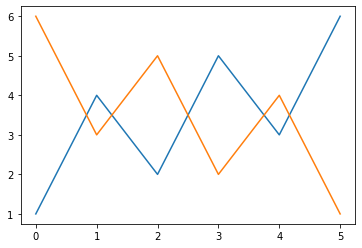

In [29]:
import matplotlib.pyplot as plt
a = np.array([6, 3, 5, 2, 4, 1])
plt.plot([1, 4, 2, 5, 3, 6])
plt.plot(a)

Вывод `[<matplotlib.lines.Line2D at 0x2ba160bed68>]` - это потому, что `plt.plot` возвращает только что созданный объект. Обычно мы не хотим этого видеть, поэтому я добавляю `;` к моей последней команде построения графика, чтобы подавить этот вывод.

По умолчанию `plot` предполагает, что x-ряд увеличивается на единицу. Вы можете предоставить свою собственную серию x, введя как x, так и y.

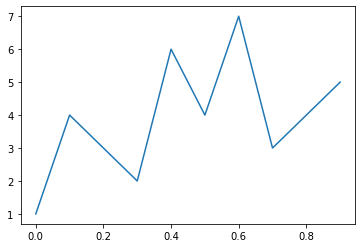

In [13]:
plt.plot(np.arange(0,1, 0.1), [1,4,3,2,6,4,7,3,4,5]);

В этих пакетах есть еще много функций, которые я использую в этой книге. Обычно я представляю их без объяснения причин, полагая, что вы можете сделать вывод об использовании из контекста или поискать объяснение в Интернете. Как всегда, если вы не уверены, создайте новую ячейку в записной книжке или запустите консоль Python и поэкспериментируйте!

### Упражнение - Создание массивов

Я хочу, чтобы вы создали массив NumPy из 10 элементов, каждый из которых содержит 1/10. Есть несколько способов сделать это; попробуйте реализовать столько, сколько сможете придумать. 

In [20]:
# your solution

### Решение

Вот три способа сделать это. Первый - это тот, который я хочу, чтобы вы знали. Я использовал оператор '/', чтобы разделить все элементы массива на 10. Вскоре мы будем использовать это для преобразования единиц измерения массива из метров в километры.

In [21]:
print(np.ones(10) / 10.)
print(np.array([.1, .1, .1, .1, .1, .1, .1, .1, .1, .1]))
print(np.array([.1] * 10))

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


Вот один из них, который я еще не рассмотрел. Функция `numpy.asarray()` преобразует свой аргумент в ndarray, если он еще не является таковым. Если это так, то данные остаются неизменными. Это удобный способ написать функцию, которая может принимать либо списки Python, либо ndarrays, и это очень эффективно, если тип уже ndarray, поскольку ничего нового не создается.

In [5]:
def one_tenth(x):
    x = np.asarray(x)
    return x / 10.

print(one_tenth([1, 2, 3]))            # Это работает
print(one_tenth(np.array([4, 5, 6])))  # и это тоже

[0.1 0.2 0.3]
[0.4 0.5 0.6]


## Сопутствующее программное обеспечение

Я пишу библиотеку Python с байесовской фильтрацией с открытым исходным кодом под названием Filter Py. Инструкции по установке приведены выше.

Filter Py размещен на GitHub по адресу (https://github.com/rlabbe/filterpy), но установленная версия `pip` должна удовлетворять вашим потребностям.

Код, специфичный для книги, хранится вместе с книгой в подкаталоге **/kf_book**. Он содержит код для форматирования книги. Он также содержит файлы python с такими именами, как *xxx*_internal.py . Я использую их для хранения функций, полезных для конкретной главы. Это позволяет мне скрывать код на Python, который не особенно интересно читать - возможно, я создаю график или диаграмму, и я хочу, чтобы вы сосредоточились на содержимом диаграммы, а не на механике того, как я создаю эту диаграмму с помощью Python. Если вам интересно, как это работает, просто зайдите и просмотрите исходный код.

В некоторых главах представлены функции, полезные для остальной части книги. Эти функции изначально определены в самой записной книжке, но код также хранится в файле Python в **/kf_book**, который при необходимости импортируется в последующих главах. Я документирую, когда я делаю это, где функция впервые определена, но это все еще находится в стадии разработки. Я стараюсь избегать этого, потому что тогда я всегда сталкиваюсь с проблемой несоответствия кода в каталоге и кодом в книге. Однако Jupyter Notebook не дает нам возможности ссылаться на ячейки кода в других тетрадках, так что это единственный известный мне механизм совместного использования функциональности между тетрадками.

Существует недокументированный каталог с именем **/experiments**. Здесь я пишу и тестирую код, прежде чем поместить его в книгу. Там есть кое-что интересное, и не стесняйтесь смотреть на это. По мере развития книги я планирую создавать примеры и проекты, и большая часть этого материала окажется там. Небольшие эксперименты в конечном итоге будут просто удалены. Если вы просто заинтересованы в чтении книги, вы можете смело игнорировать этот каталог. 


Каталог **/kf_book** содержит css-файл, содержащий руководство по стилю для книги. Внешний вид Jupyter Notebook по умолчанию довольно прост. Я следовал примерам, приведенным в таких книгах, как [Probabilistic Programming and Bayesian Methods for Hackers](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb ) [2]. На меня также оказала большое влияние фантастическая работа профессора Лорены Барба, [доступная здесь](https://github.com/barbagroup/CFDPython) [3]. Благодяря этим проектам, я смог сделать симпатичный внешний вид редактора Jupyter Notebook. 

## Мысли о Python и математике программирования

Большинство текстов по фильтру Калмана и других инженерных текстов написаны математиками или учеными. Когда есть программное обеспечение (редко), это не качество продукции. Возьмем в качестве примера книгу Пола Зарчана *Fundamentals of Kalman Filtering*. Это фантастическая книга, которая должна быть в вашей библиотеке, и это одна из немногих книг, которая предоставляет полный исходный код для каждого примера и диаграммы. Но код написан на фортране без каких-либо подпрограмм, кроме вызовов таких функций, как `MATMUL`. Фильтры Калмана повторно реализованы на протяжении всей книги. В том же списке имитация смешивается с фильтрующим кодом, что затрудняет их отличие. В некоторых главах один и тот же фильтр реализован несколько по-разному, и для выделения нескольких измененных строк используется выделенный жирным шрифтом текст. Если нужен метод Рунге Кутта, то он встроен в код без комментариев. 

Есть лучший способ. Если я хочу выполнить использовать метод Рунге Кутта, я вызываю `ode45`, я не встраиваю реализацию этого метода в свой код. Я не хочу реализовывать метод Рунге Кутта несколько раз и отлаживать его несколько раз. Если я все-таки найду ошибку, я могу исправить ее один раз и быть уверенным, что теперь она работает во всех моих различных проектах. И это читаемо. Редко бывает, чтобы я заботился о реализации этого метода (Рунге Кутта).

Это учебник по фильтрам Калмана, и вы можете утверждать, что мы *действительно* заботимся о реализации фильтров Калмана. Это верно, но код, который выполняет фильтрацию, использует около 10 строк кода. Код для реализации математики довольно тривиален. Большая часть работы, которую требует фильтр Калмана - это проектирование матриц, которые загружаются в математический движок.

Возможным недостатком является то, что уравнения, которые выполняют фильтрацию, скрыты за функциями, что, как мы могли бы утверждать, является потерей в педагогическом тексте. Я утверждаю обратное. Я хочу, чтобы вы научились использовать фильтры Калмана в реальном мире, для реальных проектов, и вам не следует повсюду вырезать и вставлять устоявшиеся алгоритмы.

Я использую классы Python. Я в основном использую классы как способ организации данных, которые требуются фильтрам, а не для реализации принципов объектно-ориентированного программирования (ООП), таких как наследование. Например, класс `KalmanFilter` хранит матрицы и векторы с именами `x`, `P`, `R`, `Q`, `S`, `y`, `K`. Я видел процедурные библиотеки для фильтров Калмана, и они требуют, чтобы программист поддерживал все эти матрицы. Возможно, это не так уж плохо для игрушечной программы, но запрограммируйте банк фильтров Калмана, и вам не понравится управлять всеми этими матрицами и другими связанными данными. Я иногда извлекал уроки из этих классов в своей собственной работе и нахожу это удобным, но я не хочу навязывать людям OO, поскольку знаю, что многим это не нравится.

## Лицензия

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Kalman Filters and Random Signals in Python</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/rlabbe/Kalman-Filters-and-Random-Signals-in-Python" property="cc:attributionName" rel="cc:attributionURL">Roger Labbe</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.<br />

http://creativecommons.org/licenses/by-nc-sa/4.0/

Based on the work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python" rel="dct:source">https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python</a>.

## Связь со мной

rlabbejr@gmail.com

## Ресурсы

* [1] http://www.greenteapress.com/
* [2] http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb
* [3] https://github.com/barbagroup/CFDPython